# Worksheet 21

Name:  Zhupei Xu
UID: U83632486

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9941618800448024
0.9941818186224863
0.9941934265897943
0.9943565253563406
0.9943813625362194
0.9944190612677587
0.994420113288366
0.9944610299530063
0.9944616153718862
0.994464028928326
0.9944890925129414
0.9945068534599782
0.9945985697720054
0.994776101181458


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.3125
[1, 0, 1, 1, 0]
0.31249999999999994


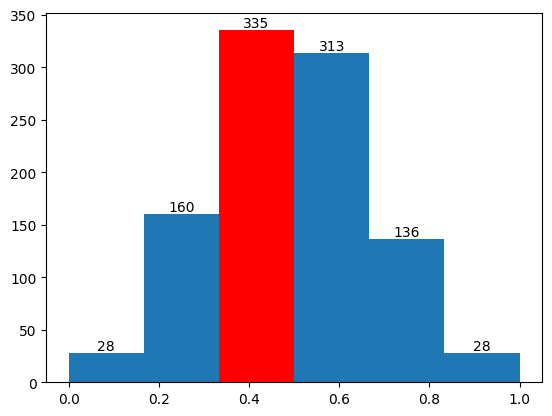

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

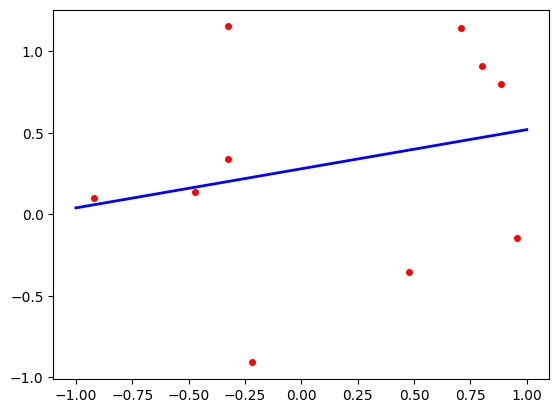

In [6]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 10

xlin = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # Random x values between -1 and 1
y = np.random.randn(SAMPLE_SIZE)  # Random noise

# Preparing data for linear regression
X = xlin.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Calculating the estimated y values for plotting
xplot = np.linspace(-1, 1, 20)
yestplot = model.predict(xplot.reshape(-1, 1))

plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(xlin, y,'ro',markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

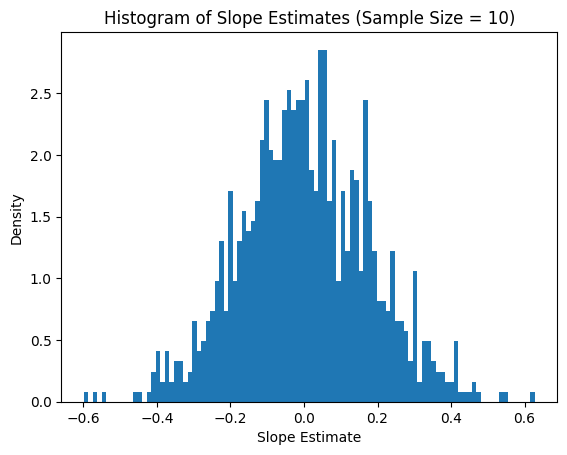

In [15]:
SAMPLE_SIZE = 100
beta_hist = []
for _ in range(1000):
    x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # Random x values between -1 and 1
    y = np.random.randn(SAMPLE_SIZE)  # y is just random noise
    model = LinearRegression().fit(x.reshape(-1, 1), y)
    beta_hist.append(model.coef_[0])

fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
plt.title("Histogram of Slope Estimates (Sample Size = 10)")
plt.xlabel("Slope Estimate")
plt.ylabel("Density")
plt.show()

As I increase mple size, the desity of the slopes close to 0 are higher.

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

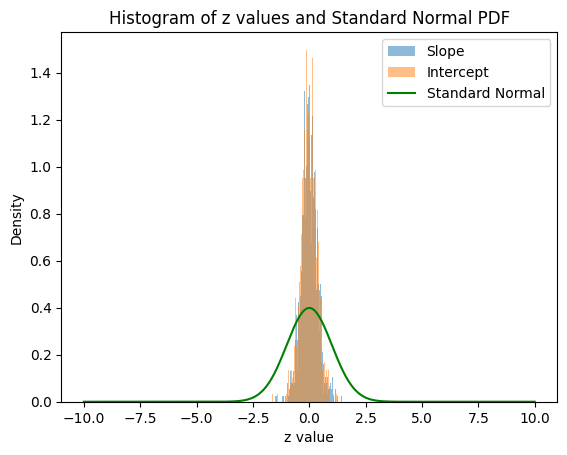

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import norm

# Constants
SAMPLE_SIZE = 10
NUM_DATASETS = 1000
z_slope_hist = []
z_intercept_hist = []

# Generating 1000 independent datasets and calculating z values
for _ in range(NUM_DATASETS):
    x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)  # Random x values between -1 and 1
    y = np.random.randn(SAMPLE_SIZE)  # y is just random noise
    X = np.column_stack((np.ones(SAMPLE_SIZE), x))  # Including intercept term explicitly

    model = LinearRegression(fit_intercept=False).fit(X, y)  # No need to fit intercept separately

    # Estimating sigma^2 (variance of residuals)
    sigma2 = np.sum((model.predict(X) - y) ** 2) / (SAMPLE_SIZE - 2)

    # Calculating S matrix
    S = np.linalg.inv(X.T @ X / SAMPLE_SIZE)

    # Calculating z values for slope and intercept
    z_slope = (model.coef_[1] - 0) / np.sqrt(sigma2 * S[1, 1])  # Slope is the second coefficient
    z_intercept = (model.coef_[0] - 0) / np.sqrt(sigma2 * S[0, 0])  # Intercept is the first coefficient

    z_slope_hist.append(z_slope)
    z_intercept_hist.append(z_intercept)

# Plotting histogram and standard normal pdf
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(z_slope_hist, bins=100, density=True, alpha=0.5, label='Slope')
ax.hist(z_intercept_hist, bins=100, density=True, alpha=0.5, label='Intercept')
ax.plot(xs, norm.pdf(xs), color='green', label='Standard Normal')
plt.title("Histogram of z values and Standard Normal PDF")
plt.xlabel("z value")
plt.ylabel("Density")
plt.legend()
plt.show()


e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

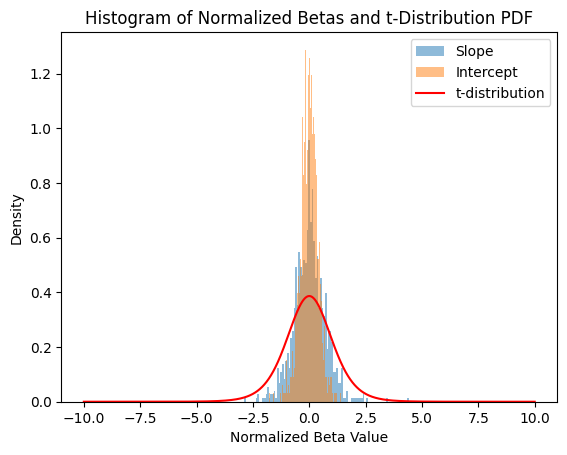

In [20]:
from scipy.stats import t

# Function to calculate standard error
def standard_error(y_true, y_pred, p):
    rss = np.sum((y_true - y_pred) ** 2)
    n = len(y_true)
    return np.sqrt(rss / (n - p))

# Constants
SAMPLE_SIZE = 10
NUM_DATASETS = 1000
beta_slope_hist = []
beta_intercept_hist = []

# Generating 1000 independent datasets and calculating normalized beta values
for _ in range(NUM_DATASETS):
    x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
    y = np.random.randn(SAMPLE_SIZE)
    X = np.column_stack((np.ones(SAMPLE_SIZE), x))

    model = LinearRegression(fit_intercept=False).fit(X, y)
    y_pred = model.predict(X)
    s = standard_error(y, y_pred, 2)  # p is 2 for slope and intercept

    # Normalizing beta values
    beta_slope = model.coef_[1] / s
    beta_intercept = model.coef_[0] / s

    beta_slope_hist.append(beta_slope)
    beta_intercept_hist.append(beta_intercept)

# Plotting histogram and t-distribution pdf
xs = np.linspace(-10, 10, 1000)
fig, ax = plt.subplots()
ax.hist(beta_slope_hist, bins=100, density=True, alpha=0.5, label='Slope')
ax.hist(beta_intercept_hist, bins=100, density=True, alpha=0.5, label='Intercept')
ax.plot(xs, t.pdf(xs, df=SAMPLE_SIZE - 2), color='red', label='t-distribution')
plt.title("Histogram of Normalized Betas and t-Distribution PDF")
plt.xlabel("Normalized Beta Value")
plt.ylabel("Density")
plt.legend()
plt.show()

f) You are given the following dataset:

[0.50155603 1.19902827]


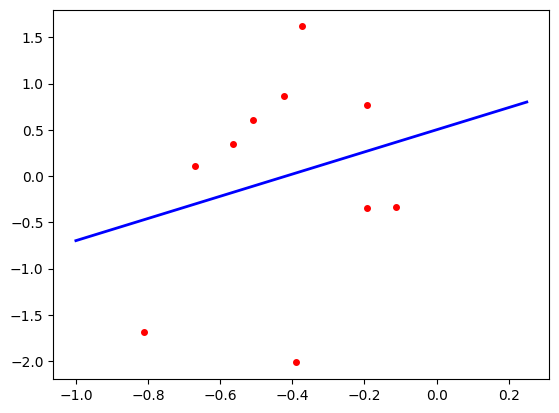

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

print(beta_hat)

xplot = np.linspace(-1,.25,20)
yestplot = beta_hat[0] + beta_hat[1] * xplot
plt.plot(xplot, yestplot,'b-',lw=2)
plt.plot(x, y,'ro',markersize=4)
plt.show()


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [22]:

# Calculating the t-statistic for the slope
n = len(x)  # Number of data points
p = 2  # Number of parameters (slope and intercept)
x_bar = np.mean(x)  # Mean of x
y_pred = beta_hat[0] + beta_hat[1] * x  # Predicted y values

# Calculating standard error of the slope
sse = np.sum((y - y_pred) ** 2)  # Sum of squared errors
sse_over_df = sse / (n - p)  # SSE divided by degrees of freedom
sum_sq_dev = np.sum((x - x_bar) ** 2)  # Sum of squared deviations of x
se_beta1 = np.sqrt(sse_over_df / sum_sq_dev)  # Standard error of the slope

# Test statistic (t-statistic)
t_statistic = beta_hat[1] / se_beta1

# Calculating the p-value for two-tailed test
p_value = 2 * t.sf(np.abs(t_statistic), df=n - p)  # Two-tailed p-value

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 0.6842586696389724
P-value: 0.5131420720905753
